In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

                                              0.0/300.2 kB ? eta -:--:--
     ------------------                     143.4/300.2 kB 4.2 MB/s eta 0:00:01
     -------------------------------------  297.0/300.2 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to C:\Users\RIVANTHIKA-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


First few rows of the dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Columns in the dataset:
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

Number of missing values in each column:
2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will 

C:\Users\RIVANTHIKA-PC\AppData\Local\Temp\ipykernel_19548\1666253002.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment'] = df_cleaned[text_column].apply(get_sentiment)
C:\Users\RIVANTHIKA-PC\AppData\Local\Temp\ipykernel_19548\1666253002.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment_category'] = df_cleaned['sentiment'].apply(categorize_sentiment)


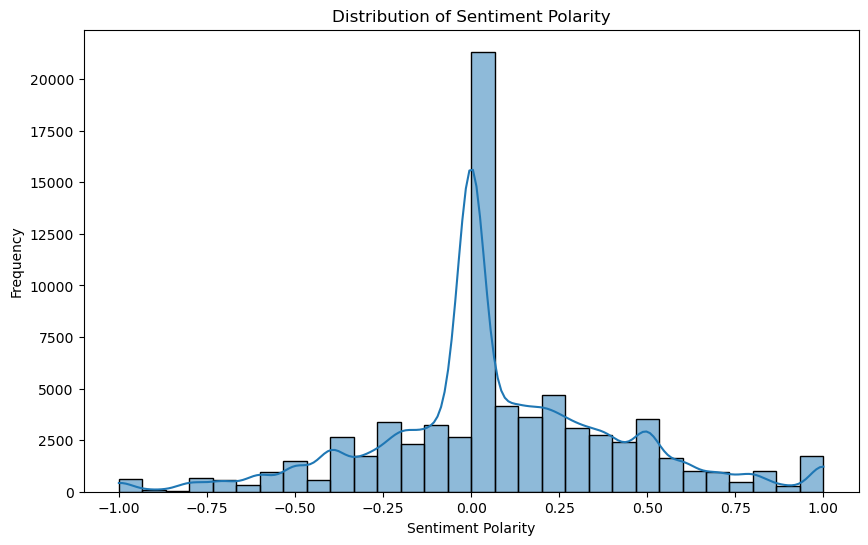

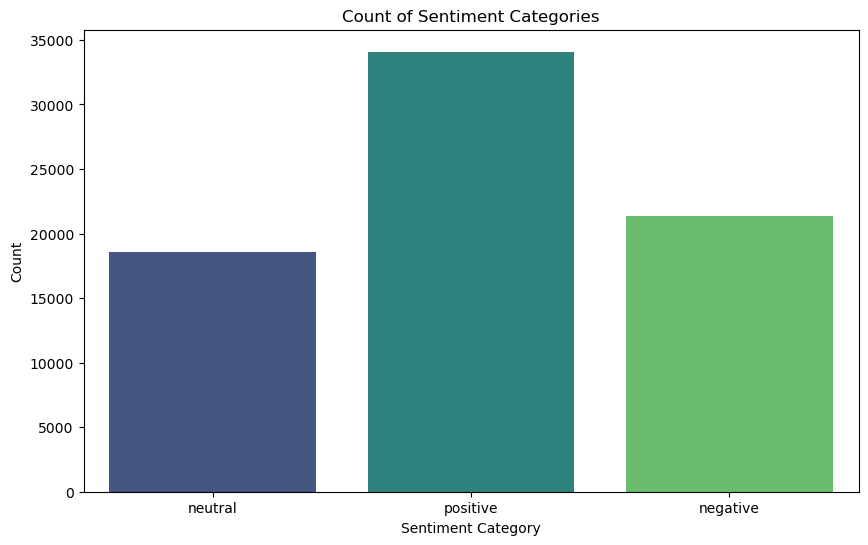

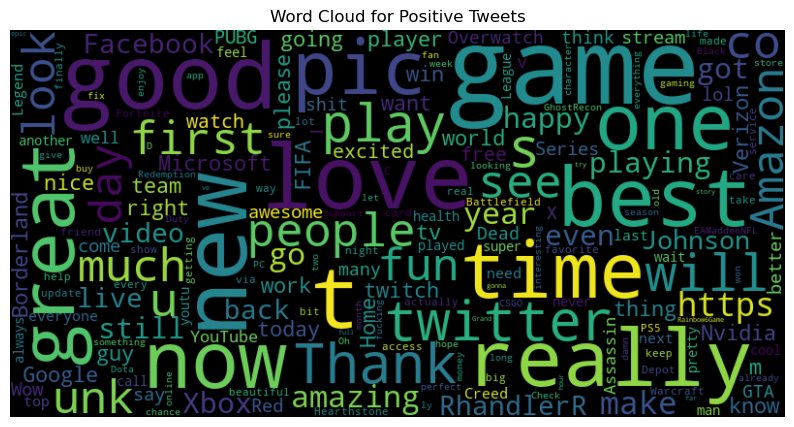

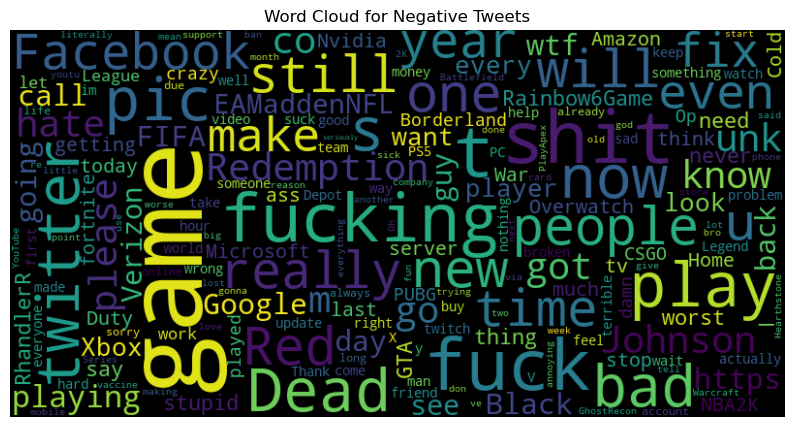

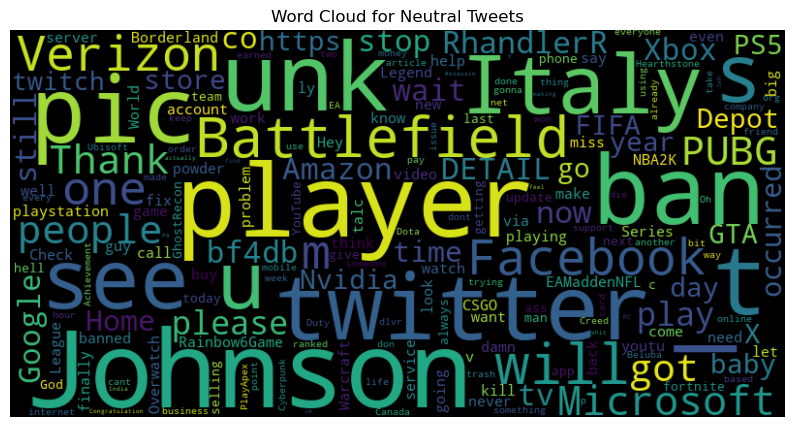

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Step 2: Load the dataset
file_path = 'twitter_training.csv'
df = pd.read_csv(file_path)

# Step 3: Inspect the dataset
print("First few rows of the dataset:")
print(df.head())

print("\nColumns in the dataset:")
print(df.columns)

# Step 4: Preprocess the data
# Check for missing values
print("\nNumber of missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df_cleaned = df.dropna()

# Identify the column containing text data
text_column = df.columns[-1]  # Assuming the text column is the last column

# Step 5: Perform sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df_cleaned['sentiment'] = df_cleaned[text_column].apply(get_sentiment)

# Categorize sentiment into positive, negative, and neutral
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df_cleaned['sentiment_category'] = df_cleaned['sentiment'].apply(categorize_sentiment)

# Step 6: Visualize the sentiment patterns
# Distribution of sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['sentiment'], kde=True, bins=30)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Count plot of sentiment categories
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=df_cleaned, palette='viridis')
plt.title('Count of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Sentiment polarity over time (assuming there's a 'date' column)
# Convert date column to datetime if it's not already
if 'date' in df_cleaned.columns:
    df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
    
    # Plot sentiment polarity over time
    plt.figure(figsize=(14, 7))
    df_cleaned.groupby(df_cleaned['date'].dt.to_period('M'))['sentiment'].mean().plot(kind='line', marker='o')
    plt.title('Average Sentiment Polarity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Polarity')
    plt.show()

# Word cloud for each sentiment category
from wordcloud import WordCloud

def plot_wordcloud(sentiment_category):
    text = ' '.join(df_cleaned[df_cleaned['sentiment_category'] == sentiment_category][text_column])
    wordcloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_category.capitalize()} Tweets')
    plt.show()

plot_wordcloud('positive')
plot_wordcloud('negative')
plot_wordcloud('neutral')
